In [14]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#import the data from a csv-file
df_full = pd.read_csv('data/eda.csv')

In [4]:
df_full.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [5]:
df_full.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id.1               int64
dtype: object

Convering date string format into date format

In [8]:
df_full['date'] = pd.to_datetime(df_full['date'])


In [9]:
df_full.head(100)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1483300570,4.000,2.500,3300.000,10250.000,1.000,0.000,0.000,3,7,...,19910.000,98040,47.587,-122.249,1950.000,6045.000,2014-09-08,905000.000,1483300570,96
96,3422049190,3.000,1.750,1960.000,15681.000,1.000,0.000,0.000,3,7,...,0.000,98032,47.358,-122.277,1750.000,15616.000,2015-03-30,247500.000,3422049190,97
97,1099611230,4.000,1.500,1160.000,6400.000,1.000,0.000,0.000,4,7,...,0.000,98023,47.304,-122.378,1160.000,6400.000,2014-09-12,199000.000,1099611230,98
98,722079104,3.000,1.750,1810.000,41800.000,1.000,0.000,0.000,5,7,...,0.000,98038,47.411,-121.958,1650.000,135036.000,2014-07-11,314000.000,722079104,99


### Exploring full dataset
Before this moment I exported data from DB and created 2 csv files and Data frames for each of them. \
One with full BD and the other with specific years range.

In [10]:
df_full.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,836.651,98077.952,47.560,-122.214,1986.620,12758.284,2014-10-29 04:20:38.171968512,540296.574,4580474287.771,10799.000
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,0.000,98001.000,47.156,-122.519,399.000,651.000,2014-05-02 00:00:00,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014-07-22 00:00:00,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014-10-16 00:00:00,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015-02-17 00:00:00,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,2015-05-27 00:00:00,7700000.000,9900000190.000,21597.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,4000.111,53.513,0.139,0.141,685.230,27274.442,NaN,367368.140,2876735715.748,6234.661


### Frequency Table.
Let's see how houses distributed based on price bins

In [11]:
binnedPrice = pd.cut(df_full['price'], bins=10)
binnedPrice.value_counts()

price
(70378.0, 840200.0]       19053
(840200.0, 1602400.0]      2118
(1602400.0, 2364600.0]      298
(2364600.0, 3126800.0]       90
(3126800.0, 3889000.0]       26
(3889000.0, 4651200.0]        4
(4651200.0, 5413400.0]        4
(6937800.0, 7700000.0]        2
(5413400.0, 6175600.0]        1
(6175600.0, 6937800.0]        1
Name: count, dtype: int64

Histogram with bins on the x-axis and the houses count on the y-axis.\
Not too informative, as most of the data located in the first 2 bins.

Text(0.5, 0, 'price in thousands')

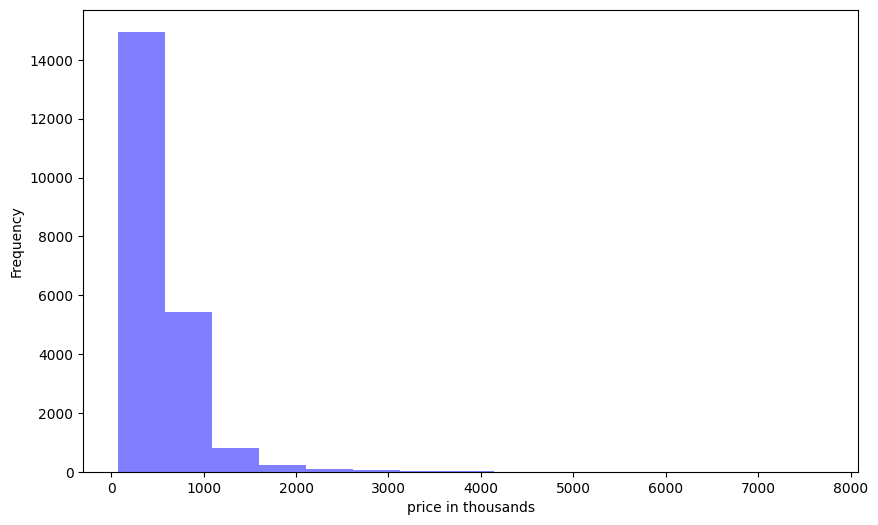

In [12]:
ax = (df_full['price']/1000).plot.hist(bins=15, figsize=(10,6), color='blue', alpha=0.5)
ax.set_xlabel('price in thousands')

### Standart Deviation & Median absolute deviation

As we can see, we have outliers which is extremely high house prices. Let's check Median absolute deviation.

In [15]:
mad_value = sm.robust.scale.mad(df_full['price'])
mad_value

222390.3327758403

In [16]:
df_full['price'].std()

367368.1401013945

In [17]:
df_full['price'].quantile([0.05,0.25,0.5,0.75,0.95])

0.050    210000.000
0.250    322000.000
0.500    450000.000
0.750    645000.000
0.950   1160000.000
Name: price, dtype: float64

### Box plot
We can see on this box plot that the median is around 0.4 millons USD. \
50 percent of the price states between 0.3 and 0.7 million USD. \
Above 75 % percentile is around 0.7 and 1.1 million USD. \
Below 25% percentile is around 0.1 and 0.3 milloin USD 

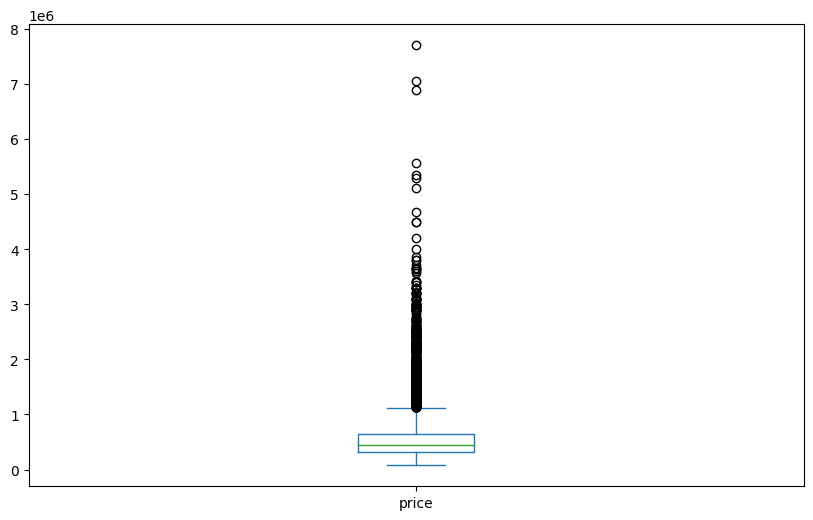

In [18]:
ax =(df_full['price']).plot.box(figsize=(10,6))

Density plot and estimates related to sold houses condition.

Text(0.5, 0, 'condition')

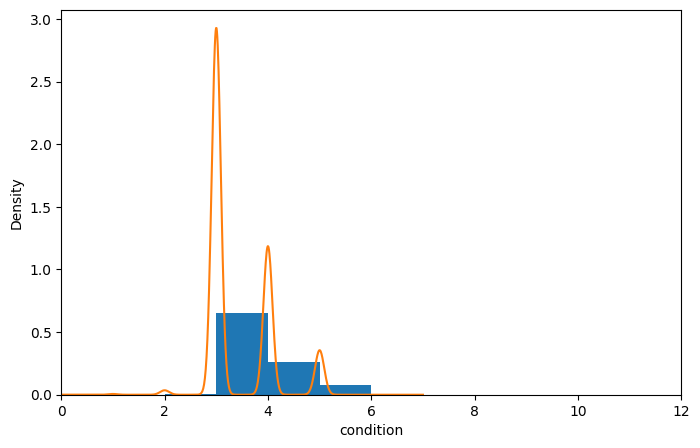

In [19]:
ax = df_full['condition'].plot.hist(density=True,xlim=[0,12], bins=range(1,12))
df_full['condition'].plot.density(ax=ax)
ax.set_xlabel('condition')

Creating grouped by price DataFrame and Bar chart.

Text(0, 0.5, 'count')

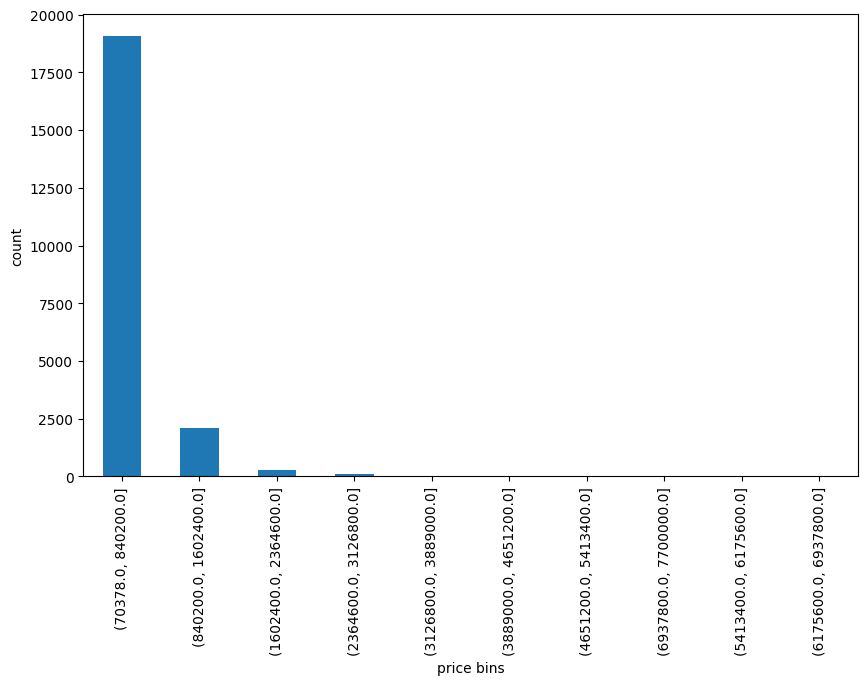

In [21]:
df_grouped = binnedPrice.value_counts()
df_grouped
ax = df_grouped.transpose().plot.bar(figsize=(10,6), legend=False)
ax.set_xlabel('price bins')
ax.set_ylabel('count')

### Correlation Matrix 
What we can see based on this map is some obviouse observations such as: 
* Positive correlataion between living and lot square fits, numbers of bathrooms, bedrooms, floors and price.
* Negative correlation between years of building and condition. The older building, the worse condition.
* Some negative correlation between zipcode and other features

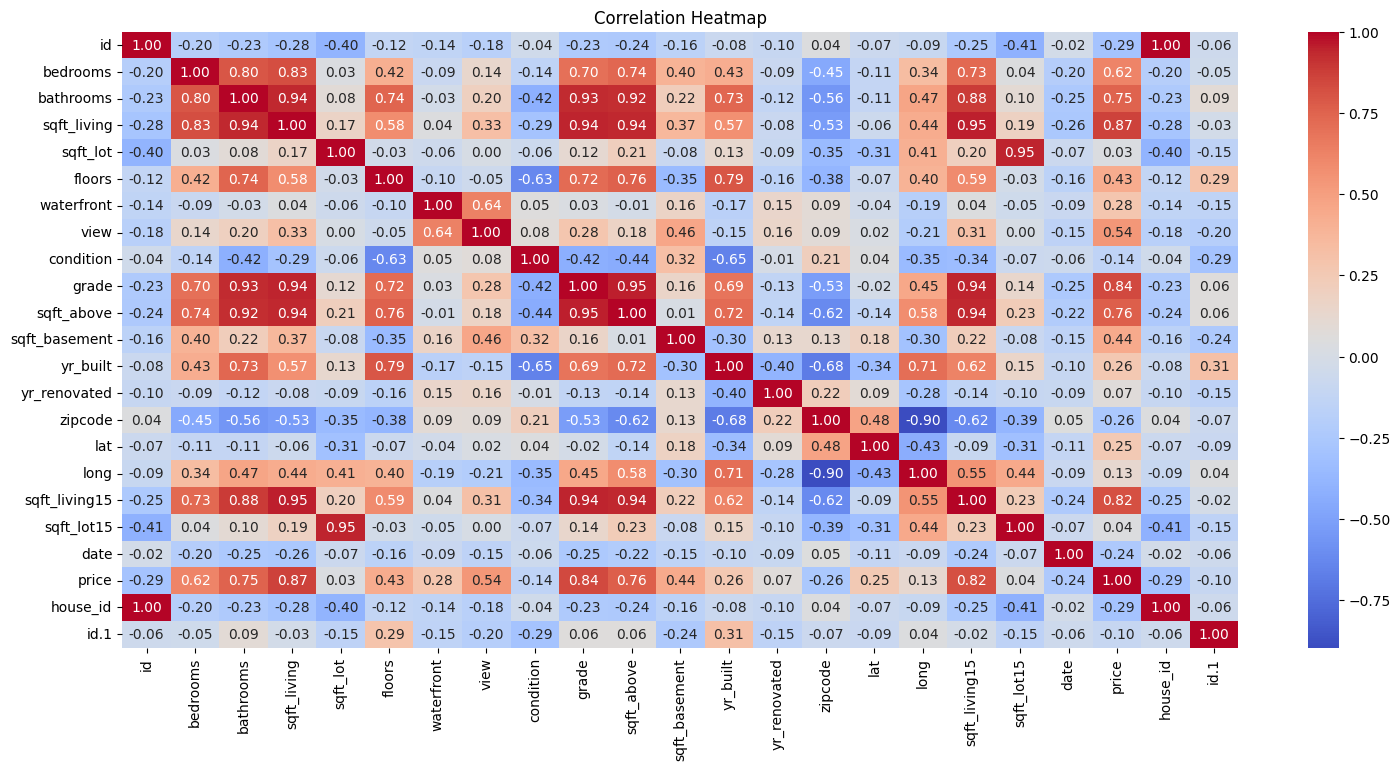

In [22]:
corr_matrix = df_full.corr()
plt.figure(figsize=(18, 8))
sns.heatmap(data=corr_matrix.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Scatter plot
With Scatter plot we see positive correlation between price and living square fits

Text(0.5, 1.0, 'Scatter Plot of House lot Size vs. Price ')

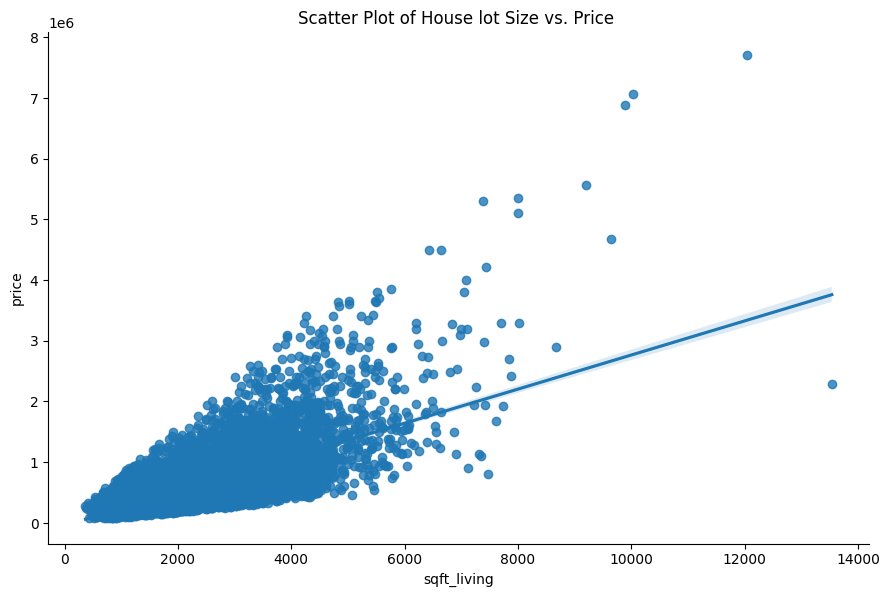

In [28]:
sns.lmplot(x='sqft_living', y='price', data=df_full, height=6, aspect=1.5)
plt.title('Scatter Plot of House lot Size vs. Price ')


### Hexagonal Binning and Contours

First I make some filltering on data

In [40]:
df_full0 = df_full[(df_full['price'] < 5000000) & (df_full['sqft_living'] < 5000)]
df_full0.shape

(21382, 23)

The scatterplot mapped above looks too dense. So rather than plot points, I grouped the records into hexagonal bins and plot them. \
There is no clear correlation between price and square living, as it could be highly related to house zipcode or condition. 

Text(0, 0.5, 'price')

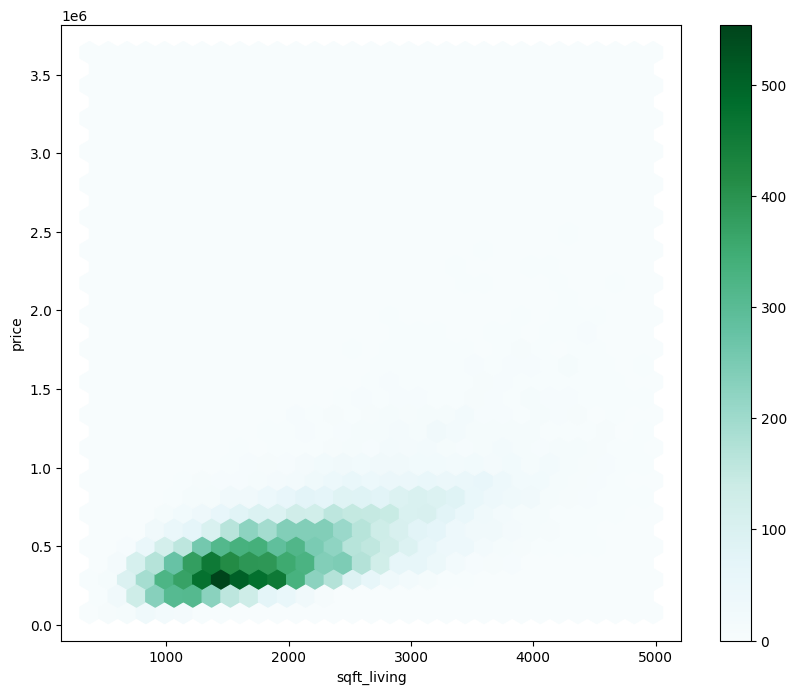

In [47]:
hexagonal = df_full0.plot.hexbin(x='sqft_living', y='price', gridsize=30, figsize=(10,8))
hexagonal.set_xlabel('sqft_living')
hexagonal.set_ylabel('price')

### Categorical variables 
Grade with bathrooms number. 

In [65]:
crosstab = pd.crosstab(df_full['bathrooms'], df_full['grade'])
#crosstab = pd.crosstab(df_full['bathrooms'], df_full['grade'], normalize='index')  # Row-wise percentages
crosstab

grade,3,4,5,6,7,8,9,10,11,12,13
bathrooms,,,,,,,,,,,
0.500,0,0,1,2,0,1,0,0,0,0,0
0.750,1,13,14,26,17,0,0,0,0,0,0
1.000,0,13,190,1414,2084,143,7,0,0,0,0
1.250,0,0,0,1,3,2,2,0,1,0,0
1.500,0,0,9,137,983,288,23,4,1,0,0
1.750,0,1,9,225,1899,808,92,12,2,0,0
2.000,0,0,17,184,1165,458,93,13,0,0,0
2.250,0,0,0,4,778,956,237,66,6,0,0
2.500,0,0,1,24,1388,2277,1226,385,68,7,1


### Categorical and Numerical data

Text(0, 0.5, 'price')

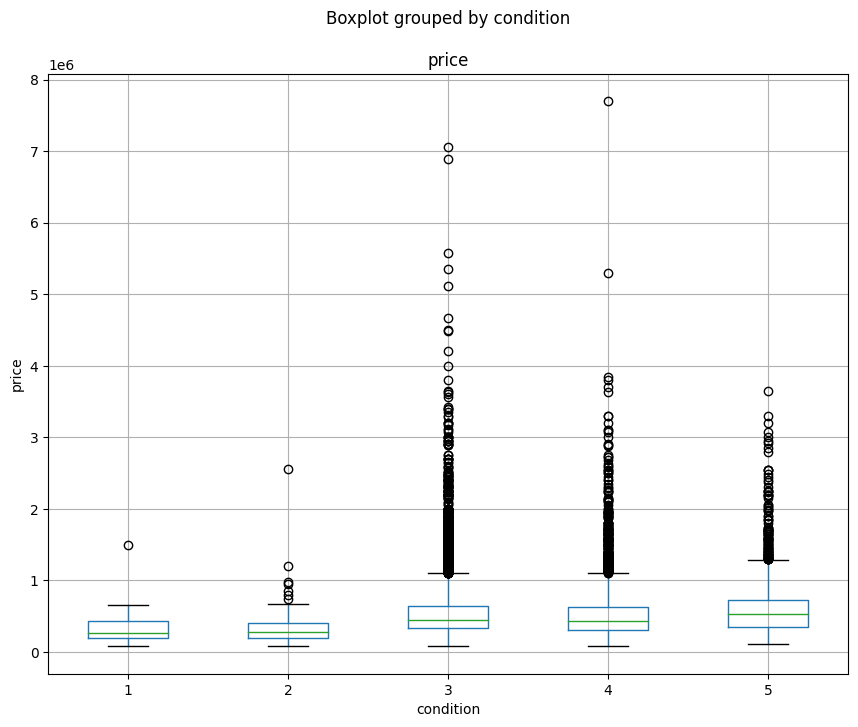

In [70]:
boxplot = df_full.boxplot(column=['price'], by='condition', figsize=(10,8))
boxplot.set_xlabel('condition')
boxplot.set_ylabel('price')

### Violin plot
Condition with price. 

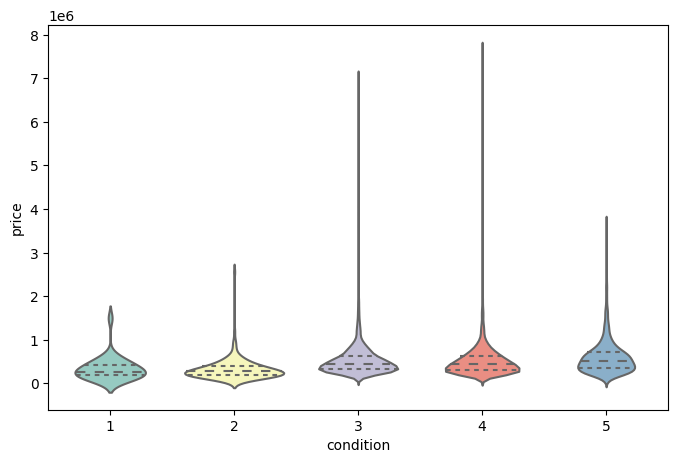

In [85]:
violin = sns.violinplot(x='condition', y='price', data=df_full, inner='quartile', palette='Set3')